In [1]:
#importing all necessary libraries
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1)data loading

#load the csv file
datafile=pd.read_csv('retail_sales_dataset.csv')

In [3]:
#to check wehether file is loaded or not 
datafile.shape

(1000, 9)

In [4]:
#to see the data of file
datafile.head()

,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Date
0,1,CUST001,Male,34,Beauty,3,50,150,24-11-2023
1,2,CUST002,Female,26,Clothing,2,500,1000,27-02-2023
2,3,CUST003,Male,50,Electronics,1,30,30,13-01-2023
3,4,CUST004,Male,37,Clothing,1,500,500,21-05-2023
4,5,CUST005,Male,30,Beauty,2,50,100,06-05-2023


In [5]:
#to check the datatype of columns
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Customer ID       1000 non-null   object
 2   Gender            1000 non-null   object
 3   Age               1000 non-null   int64 
 4   Product Category  1000 non-null   object
 5   Quantity          1000 non-null   int64 
 6   Price per Unit    1000 non-null   int64 
 7   Total Amount      1000 non-null   int64 
 8   Date              1000 non-null   object
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
#rename the column
datafile=datafile.rename(columns={'Price per Unit':'Unit Price'})


In [7]:
# 3)Descriptive Statistics, calculating mean,median,mode,std on age,quantity,unit price,total amount

#mean
datafile[['Age','Quantity','Unit Price','Total Amount']].mean() 

Age              41.392
Quantity          2.514
Unit Price      179.890
Total Amount    456.000
dtype: float64

In [8]:
#median
datafile[['Age','Quantity','Unit Price','Total Amount']].median() 

Age              42.0
Quantity          3.0
Unit Price       50.0
Total Amount    135.0
dtype: float64

In [9]:
#mode
datafile[['Age','Quantity','Unit Price','Total Amount']].mode() 

,Age,Quantity,Unit Price,Total Amount
0,43,4.0,50.0,50.0
1,64,NaN,NaN,NaN


In [10]:
#standard deviation
datafile[['Age','Quantity','Unit Price','Total Amount']].std() 

Age              13.681430
Quantity          1.132734
Unit Price      189.681356
Total Amount    559.997632
dtype: float64

In [11]:
#Total Sales 
total_sales=datafile['Total Amount'].sum()
print(total_sales)


456000


In [12]:
#Total Quantity Sold
total_QuantitySold=datafile['Quantity'].sum()
print(total_QuantitySold)


2514


In [13]:
#Time Series Analysis

#checking for date format 
type(datafile.Date[0])
# Convert 'Date' column to datetime format with explicit format specification
datafile['Date'] = pd.to_datetime(datafile['Date'])
# Display the first few rows to verify the conversion
print(datafile.head())
#converted date to datetime format 
type(datafile.Date[0])
#setting date as index
datafile.set_index('Date', inplace=True)
# Display the first few rows to verify the conversion
print(datafile.head())

   Transaction ID Customer ID  Gender  Age Product Category  Quantity  \
0               1     CUST001    Male   34           Beauty         3   
1               2     CUST002  Female   26         Clothing         2   
2               3     CUST003    Male   50      Electronics         1   
3               4     CUST004    Male   37         Clothing         1   
4               5     CUST005    Male   30           Beauty         2   

   Unit Price  Total Amount       Date  
0          50           150 2023-11-24  
1         500          1000 2023-02-27  
2          30            30 2023-01-13  
3         500           500 2023-05-21  
4          50           100 2023-05-06  
            Transaction ID Customer ID  Gender  Age Product Category  \
Date                                                                   
2023-11-24               1     CUST001    Male   34           Beauty   
2023-02-27               2     CUST002  Female   26         Clothing   
2023-01-13               3 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_800\3230953730.py:6: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  datafile['Date'] = pd.to_datetime(datafile['Date'])


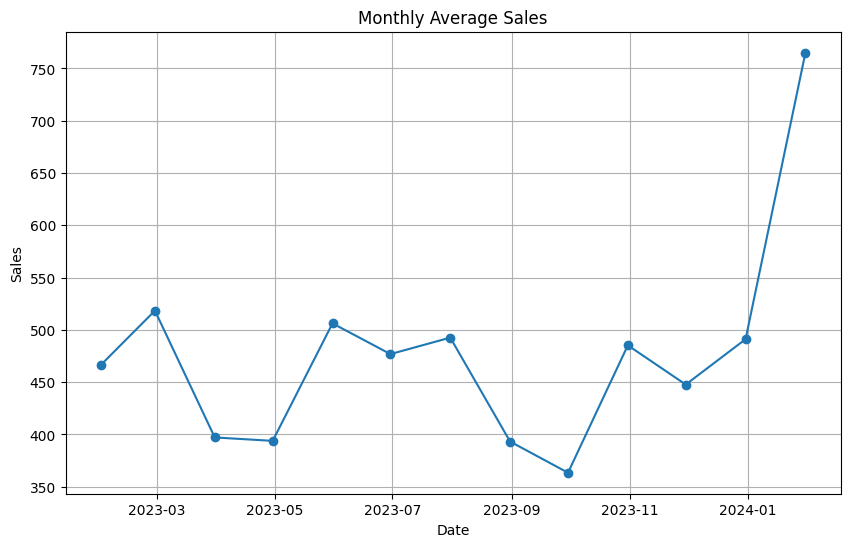

In [14]:
#time series analysis

monthly_data = datafile['Total Amount'].resample('ME').mean() 

plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data, marker='o', linestyle='-')
plt.title('Monthly Average Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

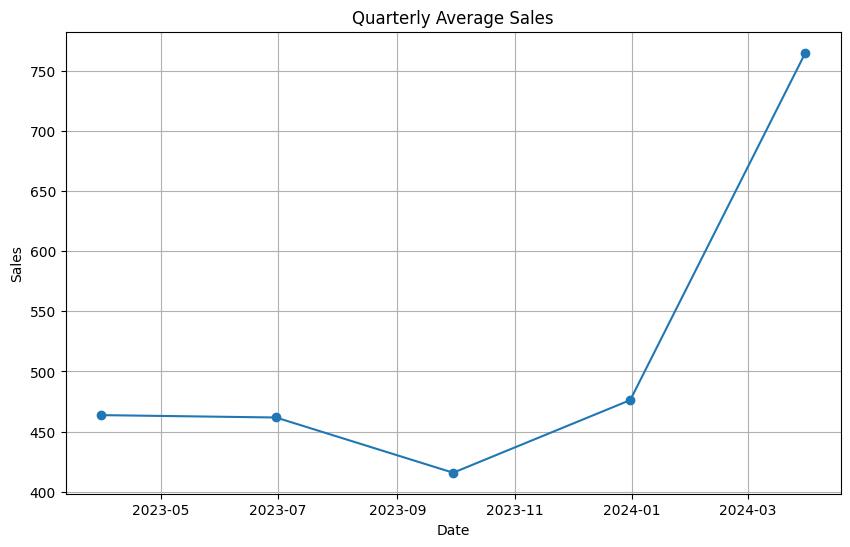

In [15]:
#time series analysis

Qr_data = datafile['Total Amount'].resample('QE').mean() 

plt.figure(figsize=(10, 6))
plt.plot(Qr_data.index, Qr_data, marker='o', linestyle='-')
plt.title('Quarterly Average Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Exploratory Data Analysis


#### Gender

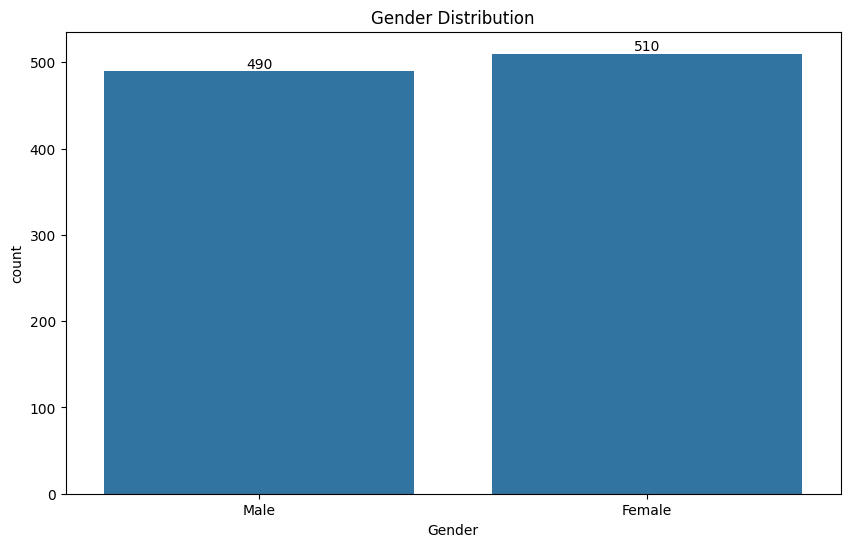

In [16]:
#customer analysis
#gender distribution
plt.figure(figsize=(10, 6))
gender_counts = sns.countplot(x='Gender',data=datafile)

for bars in gender_counts.containers:
 gender_counts.bar_label(bars)

plt.title('Gender Distribution')
plt.show()

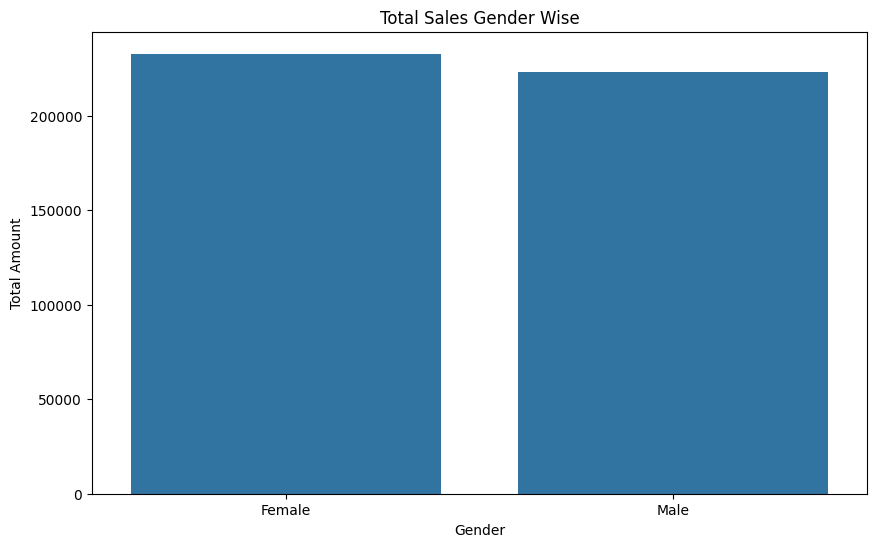

In [17]:
#sales_gender wise
plt.figure(figsize=(10, 6))
gender_expense=datafile.groupby(['Gender'], as_index=False,observed='False')['Total Amount'].sum().sort_values(by='Total Amount', ascending=False)
sns.barplot(x='Gender',y='Total Amount',data=gender_expense)
plt.title('Total Sales Gender Wise')

plt.show()

##### From above graphs it can be observed that most of the buyers are female and the amount of purchase by female is also higher than male

#### Age

In [18]:
#creating new column Age Group
bins=[17,25,35,45,55,65]
labels=['18-24','25-34','35-44','45-54','55-64']
#create new column call agegrp
datafile['Age_grp']=pd.cut(datafile['Age'],bins=bins,labels=labels,right=True)
datafile.head(11)

,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Unit Price,Total Amount,Age_grp
Date,,,,,,,,,
2023-11-24,1,CUST001,Male,34,Beauty,3,50,150,25-34
2023-02-27,2,CUST002,Female,26,Clothing,2,500,1000,25-34
2023-01-13,3,CUST003,Male,50,Electronics,1,30,30,45-54
2023-05-21,4,CUST004,Male,37,Clothing,1,500,500,35-44
2023-05-06,5,CUST005,Male,30,Beauty,2,50,100,25-34
2023-04-25,6,CUST006,Female,45,Beauty,1,30,30,35-44
2023-03-13,7,CUST007,Male,46,Clothing,2,25,50,45-54
2023-02-22,8,CUST008,Male,30,Electronics,4,25,100,25-34
2023-12-13,9,CUST009,Male,63,Electronics,2,300,600,55-64


In [19]:
#reordering the column
desired_order=['Transaction ID','Customer ID','Gender','Age','Age_grp','Date','Product Category','Quantity','Unit Price','Total Amount']

datafile=datafile.reindex(columns=desired_order)

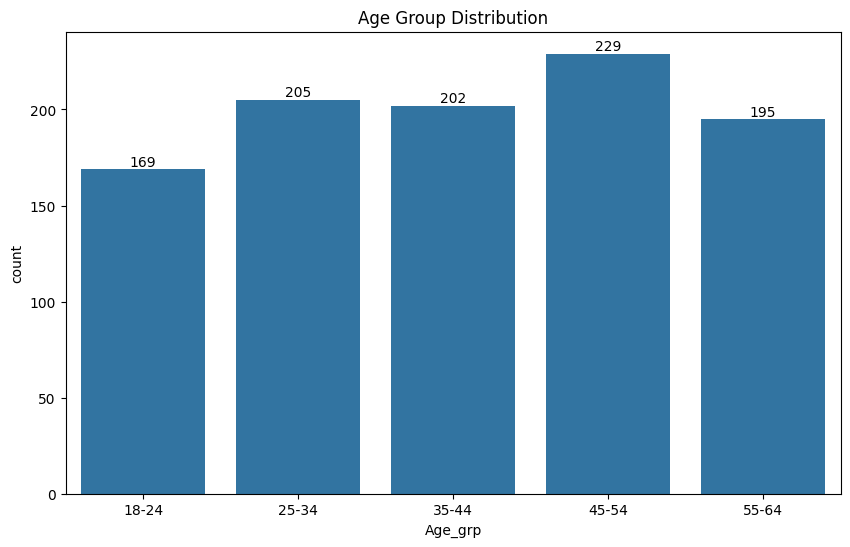

In [20]:
#Age Group distribution

plt.figure(figsize=(10, 6))
agegrp_counts = sns.countplot(x='Age_grp',data=datafile)

for bars in agegrp_counts.containers:
 agegrp_counts.bar_label(bars)

plt.title('Age Group Distribution')
plt.show()



##### From the above graph we can say that most of the customers are from age grp 45-54 and 25-34

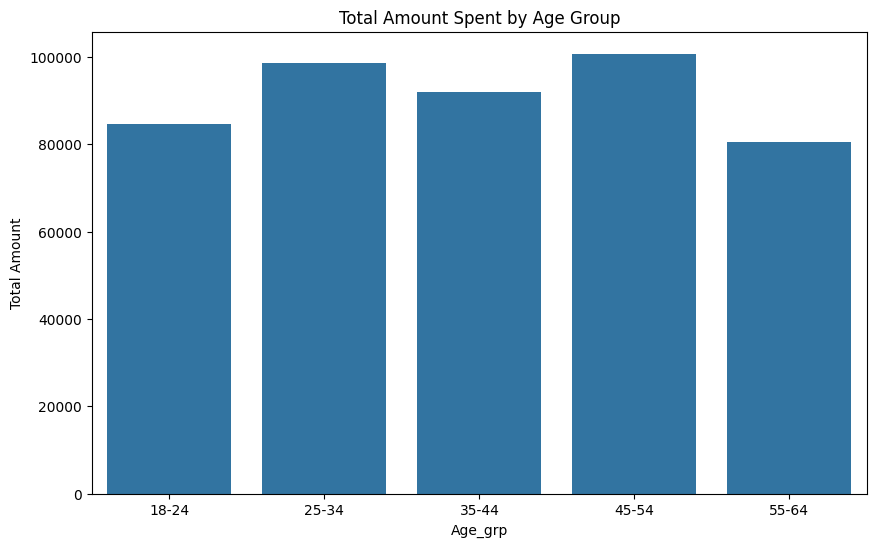

In [21]:
#customer purchase analysis

#customer expense age-grp wise

plt.figure(figsize=(10, 6))
agegrp_expense=datafile.groupby(['Age_grp'], as_index=False,observed='False')['Total Amount'].sum().sort_values(by='Total Amount', ascending=False)
sns.barplot(x='Age_grp',y='Total Amount',data=agegrp_expense)
plt.title('Total Amount Spent by Age Group')


plt.show()


##### people from age group 45-54 and  25-34 age group have done more purchasing  as compared to other age group people

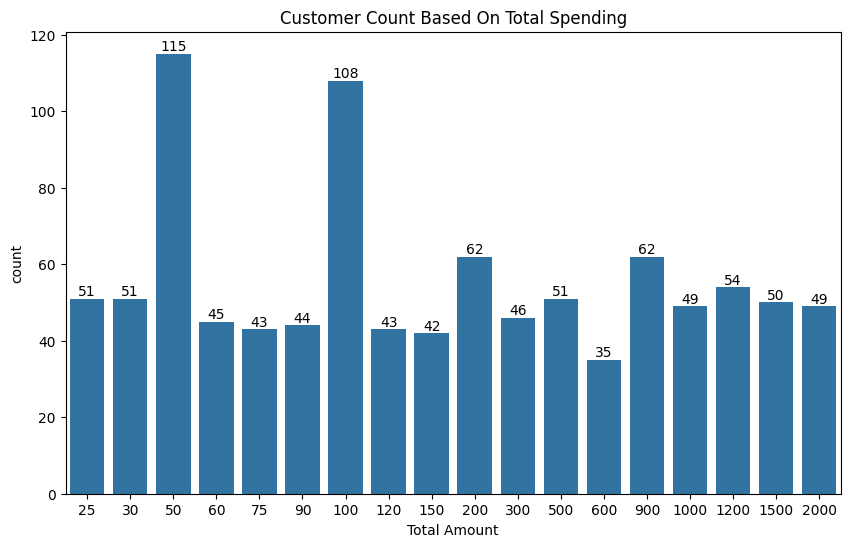

In [22]:
#customer purchase analysis

plt.figure(figsize=(10, 6))
Cust_total_expense=datafile.groupby(['Customer ID'], as_index=False)['Total Amount'].sum().sort_values(by='Total Amount', ascending=False)
cust_counts = sns.countplot(x='Total Amount',data=Cust_total_expense)

for bars in cust_counts.containers:
 cust_counts.bar_label(bars)

plt.title('Customer Count Based On Total Spending')
plt.show()

##### From the above graph, we can observe that most customers have spent a total amount of 50, followed by 100, and then 25.

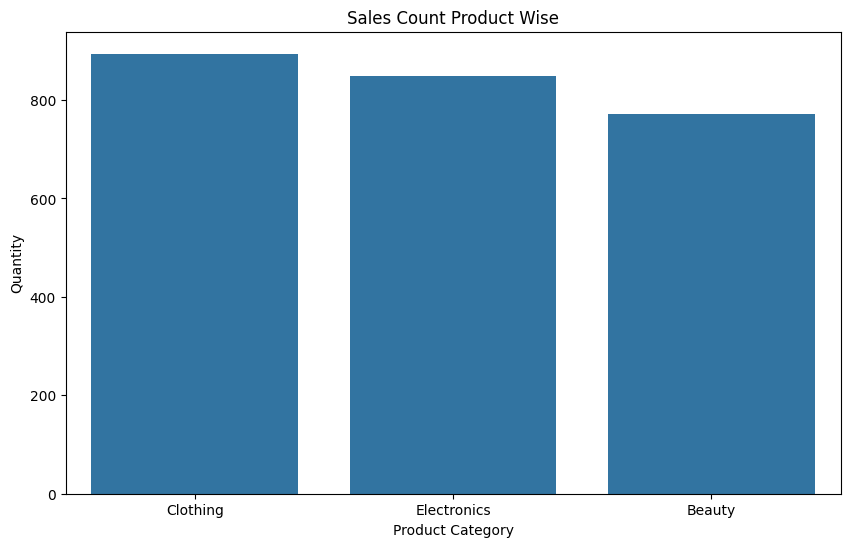

In [23]:
#product Analysis

#product sales count
product_sales=datafile.groupby(['Product Category'], as_index=False,observed=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category',y='Quantity',data=product_sales)
plt.title('Sales Count Product Wise')
plt.show()

##### From the above graph, we can conclude that the majority of the quantity sold belongs to the product category 'Clothing', followed by 'Electronics' and then 'Beauty'

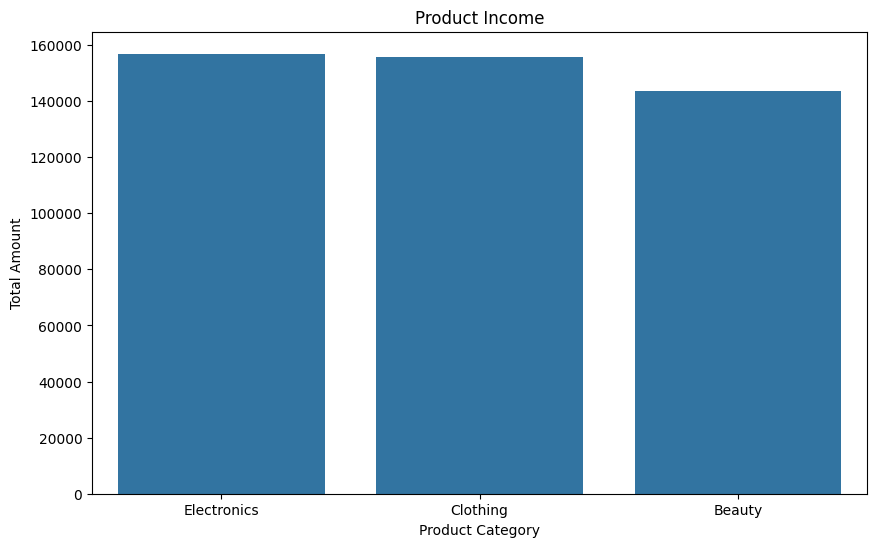

In [24]:
#Income generate by specific product

#grouping by product category
Revenue=datafile.groupby(['Product Category'], as_index=False,observed=False)['Total Amount'].sum().sort_values(by='Total Amount', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category',y='Total Amount',data=Revenue)
plt.title('Product Income')
plt.show()

##### Although the quantity of clothing category sold is higher, the electronics category generates more income

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_800\539504482.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = datafile.groupby(['Age_grp', 'Gender'])['Total Amount'].sum().reset_index()


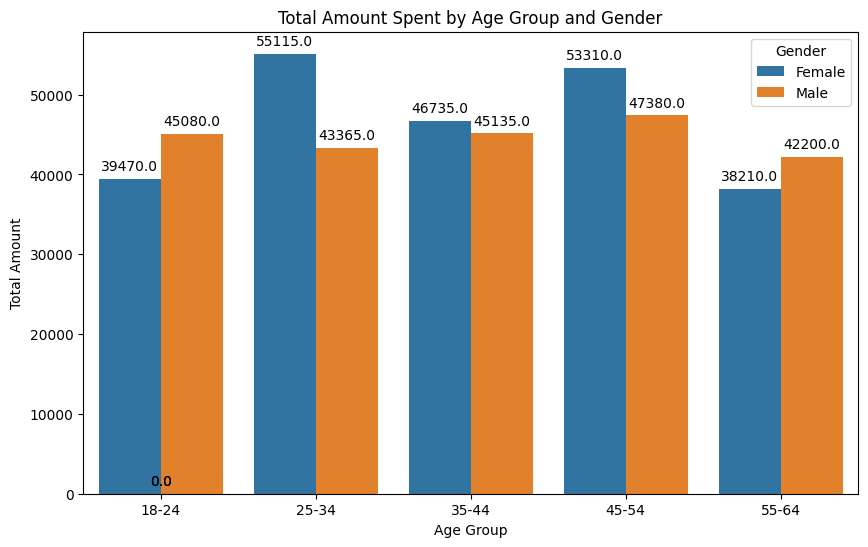

In [25]:
# Group by 'Age_grp' and 'Gender' and calculate total amount spent
grouped_data = datafile.groupby(['Age_grp', 'Gender'])['Total Amount'].sum().reset_index()

# Plotting using seaborn barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Age_grp', y='Total Amount', hue='Gender', data=grouped_data)
plt.title('Total Amount Spent by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')

# Annotate each bar with its numeric value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

##### From above we can say that female of age grp 25-34, and 45-54 have spent more money then male of that age group, and male of age group 18-24 and 55-64 have spend more money than female of that age group

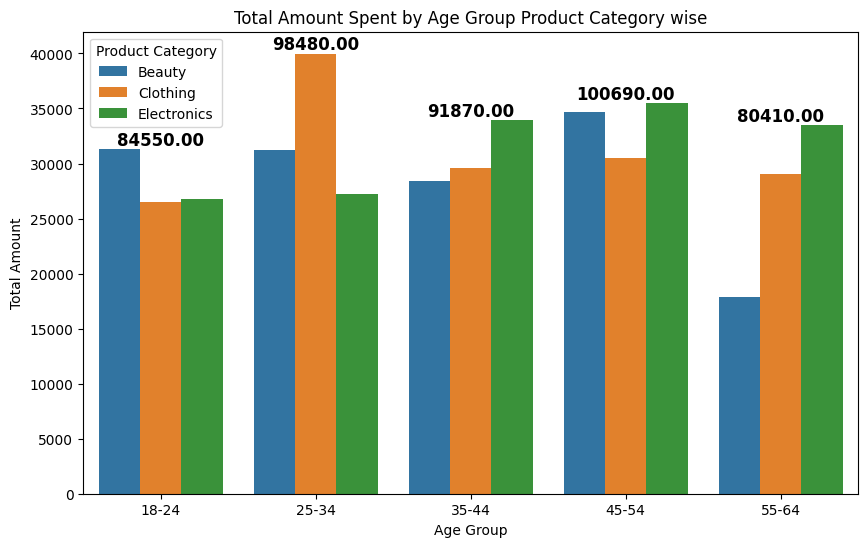

In [26]:
# Customer & product analysis
# Age-grp, spending, and product preferences

# Calculate total amount spent for each Age Grp and Product Category
grpbyage_cat = datafile.groupby(['Age_grp','Product Category'],as_index=False,observed=False)['Total Amount'].sum()

# Calculate the total amount spent per Age Grp
agegrp_total=datafile.groupby(['Age_grp'], as_index=False,observed='False')['Total Amount'].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Age_grp', y='Total Amount',hue='Product Category', data=grpbyage_cat)

# Annotating the bars with total amount for each Age Grp
for i, age_grp in enumerate(agegrp_total['Age_grp']):
    total_amount = agegrp_total.loc[agegrp_total['Age_grp'] == age_grp, 'Total Amount'].values[0]

    # Find the maximum height of bars for the current age group
    max_height = max(grpbyage_cat[grpbyage_cat['Age_grp'] == age_grp]['Total Amount'])
    ax.text(i, max_height + 10, f'{total_amount:.2f}', ha='center', va='bottom', fontsize=12, weight='bold')
    
plt.title('Total Amount Spent by Age Group Product Category wise')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')

plt.show()

##### From above we can say that Age Group 18-24 have spend more money on beauty, age grp 25-34 have spend more money on clothing,35-44 and 45-54 and 55-64 have spend more on electronics

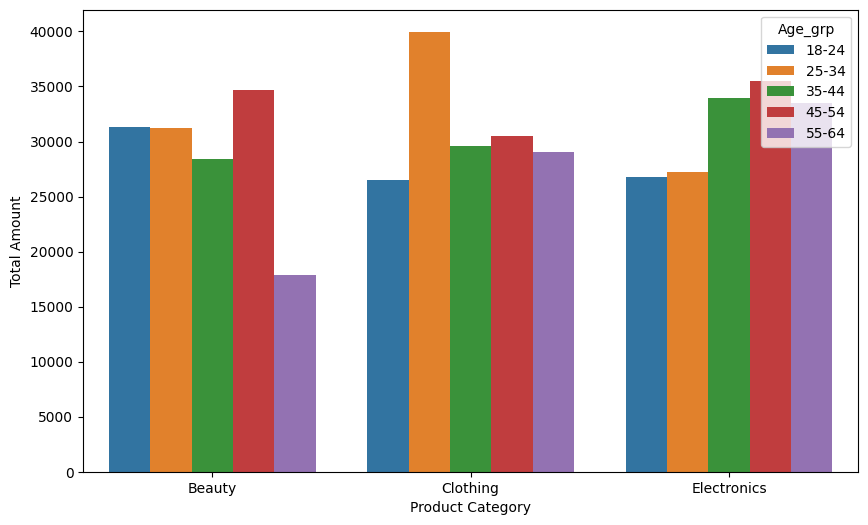

In [27]:
# Calculate total amount spent for each Age Grp and Product Category
grpbyage_cat = datafile.groupby(['Product Category','Age_grp',],as_index=False,observed=False)['Total Amount'].sum()
# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Product Category', y='Total Amount',hue='Age_grp', data=grpbyage_cat)

##### From above we can most of customers who buy beauty product are of age group 45-54 & 18-24, who buy clothing are of age group 25-34, who buy electronics are from age group 45-54 & 35-44 & 55-64

## Conclusion

#### Most Of the buyers who spend on clothing category product are of age group  25-34
#### Most of the buyers who spend money on beauty are from age 45-54
#### Most income generates from age group 45-54 and they have spend on electronics,beauty,then clothing
#### And most of the income is from electronics and clothing category products